# Properties of Erdős-Rényi (ER) networks

Erdős-Rényi networks are random networks where N nodes are randomly connected such that
the probability that a pair of nodes are linked is p. In network science, the ER random graphs
are important because they provide the simplest reference to which one can compare real-world
networks. In this exercise, we will analyze some of the properties of ER graphs.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import sys

 Use NetworkX to calculate estimates for the ensemble averages $\langle k \rangle$, $\langle c \rangle$, and $\langle d* \rangle$
 
 Do this by generating 100 ER networks for each value of p in
range p = [0.00, 0.05, ..., 0.95, 1] and N = 3. 

An estimate for the ensemble average hXi
can be calculated for each value of p by calculating the average value of X over the 100
realisations. P

lot the quantities, such that 
- p values are on the x-axis and 
- $\langle X \rangle$ values are on the y-axis.

In [2]:
def ER_properties(n, p):
    '''
    This function builds 100 ER networks with the given parameters and averages
    over them to estimate the expected values of average clustering coefficient,
    average degree and diameter of an ER network with the given parameters. The
    diameter is always computed for the largest ("giant") connected component.

    Parameters
    ----------
    n : int
      Number of nodes
    p : float
      the probability that a pair of nodes are linked is p.

    Returns
    -------
    expected_c: float
                expected value of average clustering coefficient
    expected_k: float
                expected value of average degree
    expected_d: float
    expected value of d*



    Hints:
        The following functions might be useful:
        nx.fast_gnp_random_graph(n, p),
        nx.average_clustering(graph, count_zeros=True),
        nx.connected_component_subgraphs(graph),
        nx.diameter(giant)

        nx.connected_component_subgraphs gives you a list of subgraphs
        To pick the largest, the fastest way is to use max with a key: max(x,key=len)
        returns the longest/largest element of the list x

        For computing averages over realizations, you can e.g. collect your
        values to three lists, c,k,d, and use np.mean to get the average.
    '''
    N = 100
    
    average_degree_list = [] # <k>
    average_cluster_list = [] # <c>    
    diameter_list = [] # d*
    for _ in range(N):
        g = nx.fast_gnp_random_graph(n=3, p=p)
        # find degree
        average_degree = sum(nx.average_neighbor_degree(g).values() )/ 3
        average_degree_list.append(average_degree)
        
        average_cluster_coefficient = nx.average_clustering(g) 
        average_cluster_list.append(average_cluster_coefficient)
        
        longest_subgraph = max(nx.connected_component_subgraphs(g), key=len)
        diameter = nx.diameter(longest_subgraph)
        diameter_list.append(diameter)

        
    expected_c = np.mean(average_cluster_list) # change these!
    expected_k = np.mean(average_degree_list) # change these!
    expected_d = np.mean(diameter_list) # change these!

    return expected_c, expected_k, expected_d

# ER theoretical (for N = 3)

### Average Degree

$\begin{split}
      \langle k \rangle & = 2 \langle m \rangle / N\\ & = p \times N(N-1)/N \\ & = p \times (N-1) \\ & = p \times 2
    \end{split} $

### Average clustering coefficient

$\begin{split}
      \langle c \rangle & = \sum_{i=1}^8\pi_i \times \langle c_i \rangle
      \\ & = p^3
    \end{split} $
    
### Average Diameter

$\begin{split}
      \langle d* \rangle & = \sum_{i=1}^8 \pi_i \times \langle d_i \rangle \\
      & = 1 \times (1-p)^2p \times 3 + 2 \times (1-p)p^2 \times 3 + 1 \times p^3\\
      & = 3p - 2p^3
    \end{split} $

In [3]:
def ER_properties_theoretical(p):
    '''
    This function calculates the theoretical values for clustering coefficients,
    average degree, and diameter for ER networks of size 3 and link probability p.
    The theoretical values can be viewed as expectations, or ensemble averages.
    Therefore, e.g., the expected diameter doesn't have to be integer, although it of
    course always is for a single ER network.

    Parameters
    ----------
    p : float
      the probability that a pair of nodes are linked is p.

    Returns
    -------
    c_theory: float
                theoretical value of average clustering coefficient
    k_theory: float
                theoretical value of average degree
    d_theory: float
                Theoretical value of diameter
    '''

    # Calculate the theoretical values for and ER network with parameters n, p
    # YOUR CODE HERE
    c_theory = p**3
    k_theory = 2*p
    d_theory = 3*p - 2*p**3
    return c_theory, k_theory, d_theory

### Plot

In [4]:
def plot_er_values(n, p_list):
    '''
    This function calculates the theoretical clustering coefficient, average
    degree and diameter for ER network with parameters n and p and plots them
    against the expected values from an ensemble of 100 realizations.

    Parameters
    ----------
    n : int
      Number of nodes
    p_list : list of floats
      where each member is the probability that a pair of nodes are linked.

    Returns
    -------
    fig: matplotlib Figure
                plots of expected values against theoretical values
    '''

    k_list = [] # list for degrees
    c_list = [] # list for clustering coeff values
    d_list = [] # list for diameter values
    c_list_theory = []
    k_list_theory = []
    d_list_theory = []

    for p in p_list:
        print("calculating for n=%d p=%f" % (n, p), file=sys.stderr)
        average_c, average_k, average_d = ER_properties(n, p)
        k_list.append(average_k)
        c_list.append(average_c)
        d_list.append(average_d)

        if n is 3:
            c_theory, k_theory, d_theory = ER_properties_theoretical(p)
            c_list_theory.append(c_theory)
            k_list_theory.append(k_theory)
            d_list_theory.append(d_theory)

    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(1, 3, 1) # Three subplots for <K>, <C> and <d*> [(1,3,1) means 1 row, three columns, first subplot)

    ax.plot(p_list, c_list, 'r-', label="Simulated", marker='o')
    if len(c_list_theory) > 0 and c_list_theory[0] is not None:
        ax.plot(p_list, c_list_theory, 'b-', label="Theoretical", marker='o')
    ax.set_xlabel('p')
    ax.set_ylabel('Clustering coefficient')
    ax.legend(loc=0)
    ax.set_title('N = %d' % n, size=18)

    ax2 = fig.add_subplot(1, 3, 2)
    ax2.plot(p_list, k_list, 'r-', label="Simulated", marker='o')
    if len(k_list_theory) > 0 and k_list_theory[0] is not None:
        ax2.plot(p_list, k_list_theory, 'b-', label="Theoretical", marker='o')
    ax2.set_xlabel('p')
    ax2.set_ylabel('Average degree')
    ax2.legend(loc=0)

    ax3 = fig.add_subplot(1, 3, 3)
    ax3.plot(p_list, d_list, 'r-', label="Simulated", marker='o')
    if len(d_list_theory) > 0 and d_list_theory[0] is not None:
        ax3.plot(p_list, d_list_theory, 'b-', label="Theoretical", marker='o')
    ax3.set_xlabel('p')
    ax3.set_ylabel('Diameter')
    ax3.legend(loc=0)

    fig.tight_layout()

    return fig

calculating for n=3 p=0.000000
calculating for n=3 p=0.050000
calculating for n=3 p=0.100000
calculating for n=3 p=0.150000
calculating for n=3 p=0.200000
calculating for n=3 p=0.250000
calculating for n=3 p=0.300000
calculating for n=3 p=0.350000
calculating for n=3 p=0.400000
calculating for n=3 p=0.450000
calculating for n=3 p=0.500000
calculating for n=3 p=0.550000
calculating for n=3 p=0.600000
calculating for n=3 p=0.650000
calculating for n=3 p=0.700000
calculating for n=3 p=0.750000
calculating for n=3 p=0.800000
calculating for n=3 p=0.850000
calculating for n=3 p=0.900000
calculating for n=3 p=0.950000
calculating for n=3 p=1.000000
calculating for n=100 p=0.000000
calculating for n=100 p=0.050000
calculating for n=100 p=0.100000
calculating for n=100 p=0.150000
calculating for n=100 p=0.200000
calculating for n=100 p=0.250000
calculating for n=100 p=0.300000
calculating for n=100 p=0.350000
calculating for n=100 p=0.400000
calculating for n=100 p=0.450000
calculating for n=1

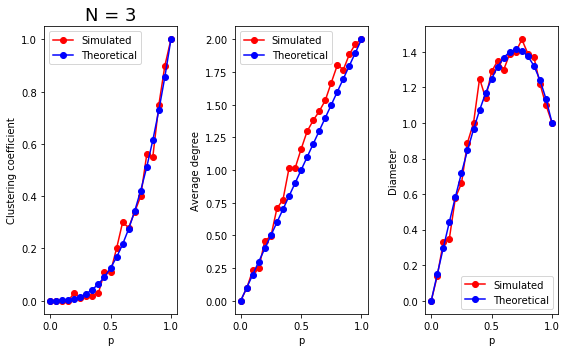

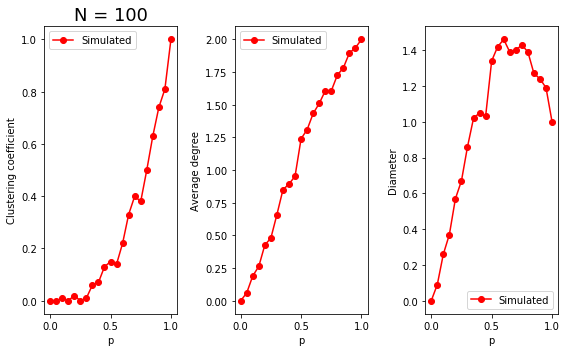

In [5]:
ps = np.arange(0, 1.01, 0.05)

fig = plot_er_values(n=3, p_list=ps)

figure_filename = 'ER_properties_3_nodes.pdf'
fig.savefig(figure_filename)
# or just use plt.show() and save manually


# Do the same steps (calculation and visulization) for n=100
fig = plot_er_values(n=100, p_list=ps)

figure_filename = './img/ER_properties_100_nodes.pdf'
fig.savefig(figure_filename)
# or just use plt.show() and save manually

In [ ]:
#